In [1]:
import numpy as np
import numpy.linalg as la
import scipy.optimize as opt
import matplotlib.pyplot as plt

# Steepest Descent in Machine Learning

Recall that steepest descent is an optimization algorithm that computes the minimum of a function by

$$x_{k+1} = x_k - \alpha_k \nabla f(x_k),$$

where $x_k$ is the solution at step $k$, and $\alpha_k$ is a line search parameter that is computed by solving the 1-dimensional optimization problem

$$
\alpha_k = \min_{\alpha_k} f(x_k - \alpha_k \nabla f(x_k))
$$

We will explore how we can use steepest descent in machine learning.

## Linear Regression

In this example, we will use steepest descent to compute a linear regression (line of best fit) model over some data.

(This isn't the only way of computing the line of best fit and later on in the course we will explore other methods for accomplishing this same task.)

The data that we will be working with is an $n \times 2$ numpy array where each row represents an $(x_i,y_i)$ pair.

In [2]:
points = np.genfromtxt('data.csv', delimiter=',')

Plot the data to see what it looks like.

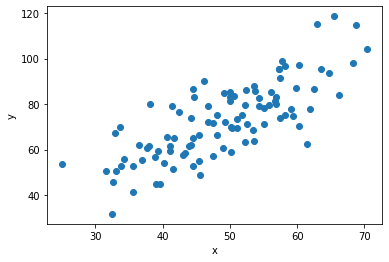

In [3]:
plt.scatter(points[:,0], points[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The first step in applying steepest descent is to formulate a function that we want to minimize.

To compute the line of best fit, we want to construct a line ($y = mx+b$) and minimize the residual between this line and the data points. Therefore, we want to minimize the following:
$$
E(m,b) = \frac{1}{N} \sum_{i=1}^N (y_i - (mx_i+b))^2
$$

that can be written as a unconstrained optimization problem:

$$\min_{m,b} E(m,b) $$

Since we will be using steepest descent to solve this optimization problem, we need to be able to evaluate $E$ and $\nabla E$. 

**Check your answer:**

Complete the function below to compute the residual $E(m,b)$.


In [4]:
#grade_clear
#clear
def E(mb, data):
    # Compute residual in the linear regression model
    # mb: Numpy array of length 2 with first entry as m and second entry as b; mb = np.array([m,b])
    # data: 2D Numpy array of length nx2 where each row represents an (xi,yi) pair with n data points     
    # add code to compute E 
    
    Evalue = ...
    
    #clear
    n,_ = data.shape
    m = mb[0]
    b = mb[1]
    totalError = np.sum((data[:,1] - (m*data[:,0]+b))**2)
    Evalue = totalError/n
    #clear

    return Evalue

You can try $m=1$ and $b=2$ as arguments to help debugging your code snippet. Your function should return `594.259213603709`.

In [5]:
m = 1.
b = 2.
mb = np.array([m,b])
print(E(mb, points))

594.259213603709


**Check your answer:**

We now need to compute the gradient of the residual function $E$, i.e.,  $\nabla E$.

You should compute the analytical form of these derivatives by hand (it is a good practice!) You can also later compare your results with SymPy. Note that the independent variables are m and b. 


In [6]:
#grade_clear
#clear
def gradE(mb, data):
    # Compute the gradient of the residual in the linear regression model
    # mb: Numpy array of length 2 with first entry as m and second entry as b
    # data: 2D Numpy array of length nx2 where each row represents an (xi,yi) pair with n data points   
    # grad: Numpy array of length 2 with first entry as partial derivative with respect to m
    #       and second entry as partial derivative with respect to b    
    m_gradient = ...
    b_gradient = ...   
    grad = np.array([m_gradient, b_gradient])
    
    #clear
    
    n = data.shape[0]
    m = mb[0]
    b = mb[1]
    m_gradient = 0.
    b_gradient = 0.
    
    for i in range(n):
        x = data[i,0]
        y = data[i,1]
        m_gradient += (2./n) * (-x*(y - (m*x+b)))
        b_gradient += (2./n) * (-1.*(y - (m*x+b)))
        
    grad = np.array([m_gradient, b_gradient])

    #clear
    return grad

You can try $m=1$ and $b=2$ as arguments to help debugging your code snippet. Your function should return `[-2192.94722958   -43.55341818]`.


In [7]:
mb = np.array([1.,2.])
print(gradE(mb,points))

[-2192.94722958   -43.55341818]


The last thing that we need before we can write a function for steepest descent, is to solve a 1-dimensional optimization problem to solve for the line search parameter. However, in machine learning we want to avoid this and employ a heuristic approach.

Instead, we will pick a "learning rate" and use that instead of a line search parameter.

In [8]:
learning_rate = 0.0001

We should now have everything that we need to use steepest descent.

### Steepest descent using a fixed learning rate

**Check your answer:**

Complete the function `steepest_descent` below. At this point, we will not be 
 imposing a tolerance as stopping criteria. Instead we will let the algorithm iterates for a fixed number of steps (`num_iterations`). 
 
The function should return a list of numpy arrays, so that we can save the parameters `m` and `b` for each step of the iterative method. 

In [9]:
#grade_clear
#clear
def steepest_descent(mb,learning_rate, data, num_iterations):
    # mb: Numpy array of length 2 containing initial guess for parameters m and b
    # learning_rate: Scalar with the learning rate that will be applied to steepest descent
    # data: 2D Numpy array of length nx2 where each row represents an (xi,yi) pair with n data points
    # num_iterations: Integer with the number of iterations to run steepest descent        
    # mb_list: list that contains the history of values [m,b] for each iteration (list of 1d numpy arrays)
    # mb_list[0] = mb; mb_list[1] = mb_updated_at_iteration_1
    mb_list = [mb]
    # add your code here
    # somewhere in your code, use mbs.append(...) to add the values of [m,b] in each iteration
    
    #clear
    x = mb
    for i in range(num_iterations):
        x = x - learning_rate * gradE(x, data)
        mb_list.append(x)
    
    #clear
    return mb_list

Now, we have everything we need to compute a line of best fit for a given data set. Let's assume that our initial guess for the linear regression model is 0, meaning that

```python
m = 0.
b = 0.
```

Let's plot the data again but now with our model to see what the initial line of best fit looks like.

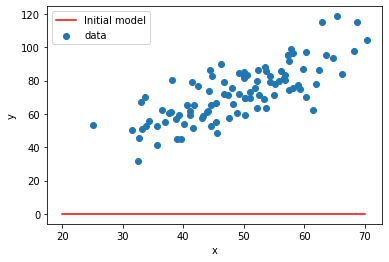

In [10]:
# Initial guess for m and b
mb_initial = np.array([0.,0.])

# Line y = mx + b
xs = np.linspace(20,70,num=1000)
ys = mb_initial[0]*xs + mb_initial[1]

plt.scatter(points[:,0], points[:,1], label = 'data')
plt.plot(xs,ys,'r', label = 'Initial model')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Perform 100 iterations of steepest descent and plot the model (line) with the optimized values of $m$ and $b$.

In [11]:
mb_list = steepest_descent(mb_initial, 0.0001, points, num_iterations=100)
mb_final = mb_list[-1]
print(mb_final)
E(mb_final,points)

[1.47880272 0.03507497]


112.64705664288809

In [23]:
mb_list

[array([0., 0.]),
 array([0.7370703 , 0.01454701]),
 array([1.10679545, 0.02187396]),
 array([1.29225466, 0.02557922]),
 array([1.38528326, 0.02746779]),
 array([1.43194723, 0.02844507]),
 array([1.45535401, 0.02896524]),
 array([1.46709462, 0.02925611]),
 array([1.4729833 , 0.02943197]),
 array([1.47593656, 0.02955013]),
 array([1.47741738, 0.02963935]),
 array([1.47815959, 0.02971405]),
 array([1.4785313 , 0.02978147]),
 array([1.47871717, 0.02984523]),
 array([1.47880982, 0.02990717]),
 array([1.4788557 , 0.02996818]),
 array([1.47887813, 0.03002873]),
 array([1.47888879, 0.03008905]),
 array([1.47889355, 0.03014926]),
 array([1.47889535, 0.0302094 ]),
 array([1.47889566, 0.03026952]),
 array([1.47889523, 0.03032962]),
 array([1.47889443, 0.03038971]),
 array([1.47889343, 0.0304498 ]),
 array([1.47889235, 0.03050989]),
 array([1.47889121, 0.03056997]),
 array([1.47889006, 0.03063005]),
 array([1.47888889, 0.03069014]),
 array([1.47888771, 0.03075022]),
 array([1.47888654, 0.0308103 

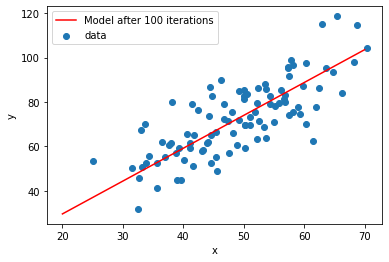

In [12]:
xs = np.linspace(20,70,num=1000)
ys = mb_final[0]*xs + mb_final[1]

plt.scatter(points[:,0], points[:,1], label = 'data')
plt.plot(xs,ys,'r', label = 'Model after 100 iterations')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Compute the residual (using the function `E`) for each update of `m` and `b` that was stored in `mb_list`. Recall how `mb_list` was computed above: 

``` python 
mb_list = steepest_descent(mb_initial, 0.0001, points, num_iterations=100)
```

You can check that `mb_list` has 101 entries (or 101 1d numpy arrays, each one of them containing update values for `m` and `b`). The residual function that you defined above has signature `E(mb, data)` where `mb` is a 1d numpy array with the values of `m` and `b`, and data is the provided dateset in `points`.

Store the residual for each pair (m,b) in the list `Elist`. The list `Elist` must have the same number of entries as the list `mb_list`.

*Note: you could have included this calculation inside your `steepest_descent` function.*

In [13]:
#grade_clear
#clear
Elist = []
#clear
for mb in mb_list:
    Elist.append(E(mb, points))

Plot the residual at each iteration. 

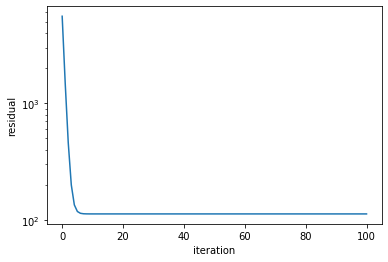

In [14]:
Elist_array = np.array(Elist)
plt.semilogy(Elist_array)
plt.xlabel('iteration')
plt.ylabel('residual')
plt.show()

It looks like the algorithm didn't need all the 100 iterations. Can you think of a better stopping criteria? Try that later (for now, let's just move on to the next section).

### Steepest descent - what happens when we change the learning rate?

For all these experiments, we stated that learning_rate $= 0.0001$. What would happen if we were to increase or decrease the learning rate?

**Check your answer:**

Call the function `steepest_descent` for the learning rates `[1e-6, 1e-5, 1e-4]`. For each learning rate, append the return list `mb_list` to the list `mb_LR`. Use `mb_initial` as initial guess, but do not store the initial guess in `mb_LR`.

In [15]:
#grade_clear
#clear
learning_rates = [1e-6, 1e-5, 1e-4]
mb_LR = []
# add your code snippet here:

#clear
for learning_rate in learning_rates:
    mb = steepest_descent(mb_initial, learning_rate, points, num_iterations=100)
    print(mb[-1])
    mb_LR.append(mb)

[0.58157754 0.01149085]
[1.47000284 0.02949362]
[1.47880272 0.03507497]


You are now able to plot the following curves:

- The data and the model (lines) for the three different values of `learning_rate`
- The residual for the three different values of `learning_rate`

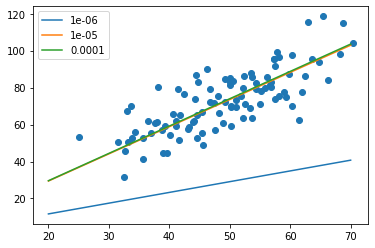

In [16]:
xs = np.linspace(20,70,num=1000)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(points[:,0], points[:,1])

for mb,learning_rate in zip(mb_LR, learning_rates):
    ys = mb[-1][0]*xs + mb[-1][1]
    plt.plot(xs,ys, label = learning_rate)
    plt.draw()
plt.legend()
plt.show()

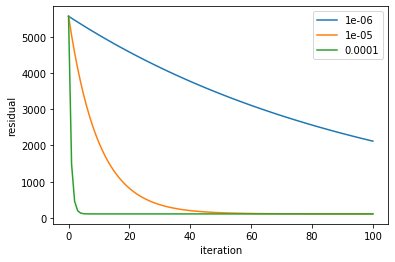

In [17]:
residual = []

for mb_per_lr in mb_LR:
    r = []
    for mb in mb_per_lr:
        r.append(E(mb,points))
    residual.append(r)

for r, lr in zip(residual, learning_rates):
    plt.plot(r, label = lr)
plt.xlabel('iteration')
plt.ylabel('residual')
plt.legend()
plt.show()

As we can see from the above plots, the number of steps for convergence will change depending on the `learning_rate`. 

### Steepest descent using golden-section search

In class, we learned about golden-section search for solving for the line search parameter. How can we use it to compute the parameter $\alpha$ in steepest descent for this example?

We need to first create a wrapper function so that we can minimize $f(x_k - \alpha \nabla f(x_k))$ with respect to $\alpha$.

In [18]:
def objective_1d(alpha, mb, data):
    mb_next = mb - alpha * gradE(mb, data)
    return E(mb_next, data)

**Check your answer:**

Create a new steepest descent function called `steepest_descent_gss`.

You should start from the function `steepest_descent(mb,learning_rate, data, num_iterations)` that you created above. However, the new function should not have `learning_rate` as an argument.


To compute the learning rate inside the function, we will use the line search implemented at `scipy.optimize.golden` to compute $\alpha$.

```python
alpha = opt.golden(objective_1d, args = (np.array([m,b]),data))
```

In [19]:
#grade_clear
#clear
def steepest_descent_gss(mb, data, num_iterations):
    # mb: Numpy array of length 2 containing initial guess for parameters m and b
    # data: 2D Numpy array of length nx2 where each row represents an (xi,yi) pair with n data points
    # num_iterations: Integer with the number of iterations to run steepest descent        
    # mb_list: list that contains the history of values [m,b] for each iteration
    mb_list = [mb]
    # add your code here
    # somewhere in your code, use mbs.append(...) to add the values of [m,b] in each iteration
    
    #clear
    for i in range(num_iterations):
        alpha = opt.golden(objective_1d, args = (mb,data))
        mb = mb - alpha * gradE(mb, data)
        mb_list.append(mb)
    #clear
    
    return mb_list

In [20]:
mbs_gss = steepest_descent_gss(mb_initial,points,num_iterations=10)
print(mbs_gss[-1])
E(mbs_gss[-1],points)

[1.32245222 7.9899454 ]


110.25738350989737

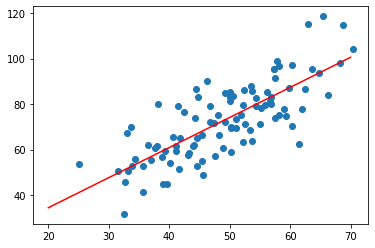

In [21]:
xs = np.linspace(20,70,num=1000)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(points[:,0], points[:,1])
ys = mbs_gss[-1][0]*xs + mbs_gss[-1][1]
plt.plot(xs,ys,'r')


Plot the residual of using golden-section search for the line search parameter and compare the results with using a learning rate. Does this improve the convergence? How many iterations does it take for steepest descent to converge?

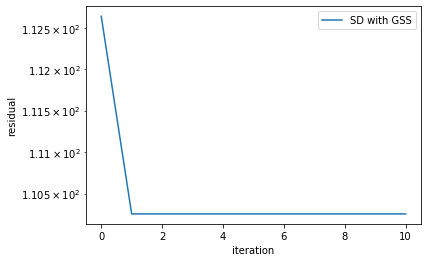

In [22]:
mbs_gss = steepest_descent_gss(mb,points,num_iterations=10)

err_gss = []
for mb in mbs_gss:
    err = E(mb,points)
    err_gss.append(err)

plt.semilogy(err_gss, label = 'SD with GSS')
plt.xlabel('iteration')
plt.ylabel('residual')
plt.legend()
plt.show()

In practice, we don't use golden-section search in machine learning and instead we employ the heuristic that we described earlier of using a learning rate (note that the learning rate is not fixed, but updated using different methods). Why would we want use a learning rate over a line search parameter?